# Introduction to Exploratory Data Analysis (EDA) using `pandas` (Tutorial)

The data for this exercise is borrowed from [here](https://www.kaggle.com/leonardopena/top50spotify2019).

### 1. Read data

In [138]:
import pandas as pd

df = pd.read_csv(r"../data/top50.csv", encoding='ISO-8859-2') #r will give 

# r will change \ to /
# ".. is 'relative path' goes up to parent file and over to data file
# ISO encoding allows for reading special characters


df.shape


(50, 14)

_`pandas.read_csv()` documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html_

_Python encoding: https://docs.python.org/3/library/codecs.html#standard-encodings_

In [5]:
# view data
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Seńorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


Display some basic information about this data frame.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


You can also use `df.dtypes` to view data types for each column.

View column names.

In [141]:
df.columns
df.columns[0]


'Unnamed: 0'

In [142]:
df.loc[4, 'Energy'] #gets location of row 4

65

### Drop a column

In [143]:
drop_col = df.columns[0]

drop_col

'Unnamed: 0'

In [144]:
#row/column axis (0,1)
#df.drop('Unnamed: 0', axis=1) #droping from column axis '1'

df = df.drop(drop_col, axis=1) #programatic way of dropping column

df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Seńorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


### Modify column names

View column names.

In [145]:
df.columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

Convert the column-names array into a string object.

In [146]:
df.columns.str

Example: Convert all column names into uppercase.

In [147]:
# for col in df.columns:
#     print(col.upper())

df.columns.str.upper()

Index(['TRACK.NAME', 'ARTIST.NAME', 'GENRE', 'BEATS.PER.MINUTE', 'ENERGY',
       'DANCEABILITY', 'LOUDNESS..DB..', 'LIVENESS', 'VALENCE.', 'LENGTH.',
       'ACOUSTICNESS..', 'SPEECHINESS.', 'POPULARITY'],
      dtype='object')

Remove dots from column names.

In [148]:
df.columns.str.replace('.', '')

Index(['TrackName', 'ArtistName', 'Genre', 'BeatsPerMinute', 'Energy',
       'Danceability', 'LoudnessdB', 'Liveness', 'Valence', 'Length',
       'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

Save the results into the data frame.

In [149]:
df.columns = df.columns.str.replace('.', '')

df.head()



,TrackName,ArtistName,Genre,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Seńorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [150]:
#df.describe() #regular

df.describe().T #inverted

,count,mean,std,min,25%,50%,75%,max
BeatsPerMinute,50.0,120.06,30.898392,85.0,96.00,104.5,137.50,190.0
Energy,50.0,64.06,14.231913,32.0,55.25,66.5,74.75,88.0
Danceability,50.0,71.38,11.929880,29.0,67.00,73.5,79.75,90.0
LoudnessdB,50.0,-5.66,2.056448,-11.0,-6.75,-6.0,-4.00,-2.0
Liveness,50.0,14.66,11.118306,5.0,8.00,11.0,15.75,58.0
Valence,50.0,54.60,22.336024,10.0,38.25,55.5,69.50,95.0
Length,50.0,200.96,39.143879,115.0,176.75,198.0,217.50,309.0
Acousticness,50.0,22.16,18.995553,1.0,8.25,15.0,33.75,75.0
Speechiness,50.0,12.48,11.161596,3.0,5.00,7.0,15.00,46.0
Popularity,50.0,87.50,4.491489,70.0,86.00,88.0,90.75,95.0


### Correlations

In [151]:
corr_matrix = df.corr()

corr_matrix
# print(corr_matrix)

,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
BeatsPerMinute,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
Energy,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
Danceability,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
LoudnessdB,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
Liveness,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
Valence,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
Length,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
Acousticness,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
Speechiness,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553
Popularity,0.196097,-0.080295,-0.071413,-0.043085,0.092564,-0.317752,-0.087639,-0.034684,0.238553,1.000000


Plot the correlation matrix.

In [152]:
# import necessary packages
import matplotlib.pyplot as plt
import seaborn as sns

# if needed, enable inline plots
#plt.ion()

_The `ion()` function causes the output of plotting commands to be displayed inline within frontends (like the Jupyter notebook), directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document. More details here: https://ipython.readthedocs.io/en/stable/interactive/plotting.html_

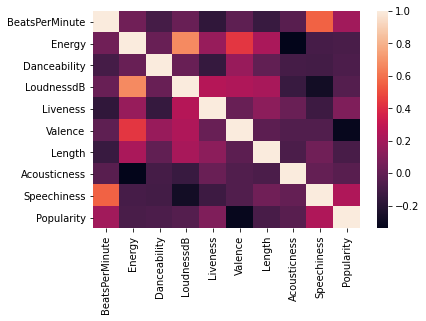

In [153]:
# create a heat map
sns.heatmap(corr_matrix); #; takes away operation descrioption "<subaxis> ASDH!#@$IU@#B"

Increase the figure size.

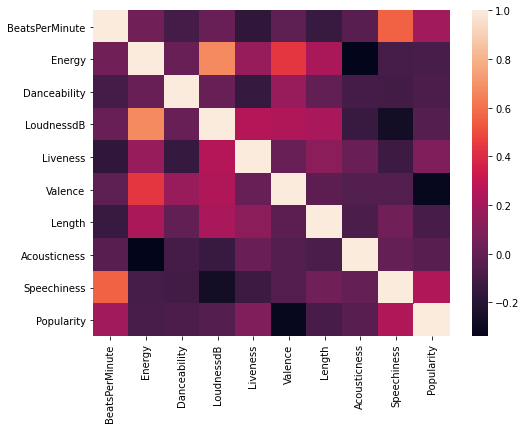

In [154]:
# set figure size
plt.figure(figsize=(8,6))

# create a heat map
sns.heatmap(corr_matrix);

Change the color palette.

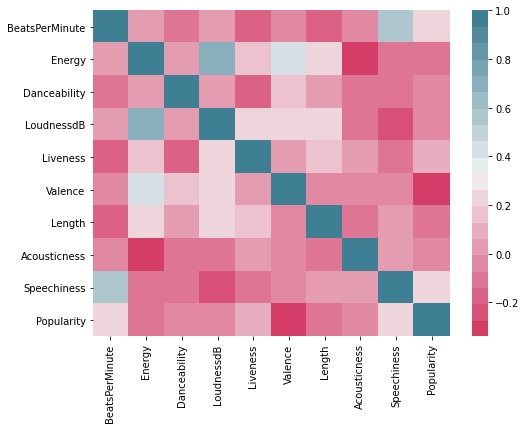

In [155]:
# define a color palette 
       #(good for working with clients)
my_cmap = sns.diverging_palette(0, 220, n=20) #10 is read, 220 is blueish, n=20 is steps

# set figure size
plt.figure(figsize=(8,6))

# create a heat map
sns.heatmap(corr_matrix, cmap = my_cmap);


# if needed, adjust the truncated top and bottom rows
#ax.set_ylim(len(corr_matrix), 0)

_Note: Depending on the version of `matplotlib` on your computer, some of you may see truncated top and bottom rows. This is a known bug; see https://github.com/matplotlib/matplotlib/issues/14751_

### Distributions

View summary statistics.

In [156]:
df.describe()

,BeatsPerMinute,Energy,Danceability,LoudnessdB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


_`pandas.DataFrame.describe` documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html_

Transpose the summary statistics for better visibility.

In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BeatsPerMinute,50.0,120.06,30.898392,85.0,96.00,104.5,137.50,190.0
Energy,50.0,64.06,14.231913,32.0,55.25,66.5,74.75,88.0
Danceability,50.0,71.38,11.929880,29.0,67.00,73.5,79.75,90.0
LoudnessdB,50.0,-5.66,2.056448,-11.0,-6.75,-6.0,-4.00,-2.0
Liveness,50.0,14.66,11.118306,5.0,8.00,11.0,15.75,58.0
Valence,50.0,54.60,22.336024,10.0,38.25,55.5,69.50,95.0
Length,50.0,200.96,39.143879,115.0,176.75,198.0,217.50,309.0
Acousticness,50.0,22.16,18.995553,1.0,8.25,15.0,33.75,75.0
Speechiness,50.0,12.48,11.161596,3.0,5.00,7.0,15.00,46.0
Popularity,50.0,87.50,4.491489,70.0,86.00,88.0,90.75,95.0


Export the summary statistics.

In [158]:
df.describe().T.to_csv('../output/descr_top50.csv')

### Histograms

Plot a histogram for one variable.

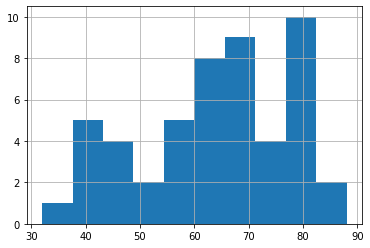

In [159]:
df['Energy'].hist(); #or df.Energy.hist();

_`pandas.DataFrame.hist` documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html_

Plot histograms for multiple variables.

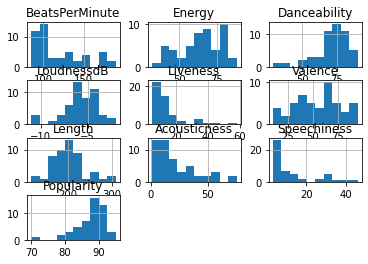

In [160]:
df.hist();

Change the bin size.

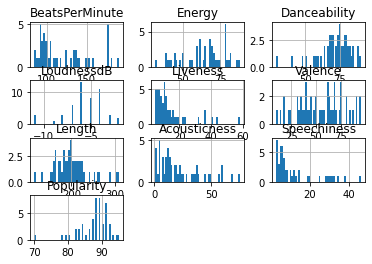

In [161]:
df.hist(bins=50);

#### Format plots.

Define 10 subplots and arrange them into 5 rows and 2 columns.

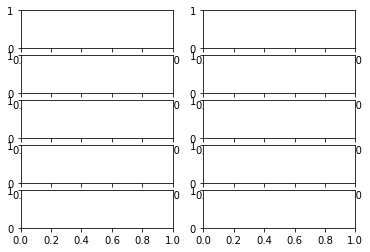

In [162]:
#this returns two sub-plots

fig, axes = plt.subplots(nrows=5, ncols=2)

View the axes component.

In [163]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

Iterate through the axes.

In [164]:
for ax in axes:
    print(ax)

[<AxesSubplot:> <AxesSubplot:>]
[<AxesSubplot:> <AxesSubplot:>]
[<AxesSubplot:> <AxesSubplot:>]
[<AxesSubplot:> <AxesSubplot:>]
[<AxesSubplot:> <AxesSubplot:>]


Iterate thru the column names in the data frame.

In [165]:
for i, col in enumerate(df.columns):
    print(i, col)

0 TrackName
1 ArtistName
2 Genre
3 BeatsPerMinute
4 Energy
5 Danceability
6 LoudnessdB
7 Liveness
8 Valence
9 Length
10 Acousticness
11 Speechiness
12 Popularity


Isolate numeric columns.

In [166]:
num_cols = df.columns[3:]
num_cols
#len(num_cols)

Index(['BeatsPerMinute', 'Energy', 'Danceability', 'LoudnessdB', 'Liveness',
       'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

Another way to isolate numeric columns is by using `df.dtypes`.

In [167]:
#df.dtypes

#df.dtypes =='int64'

df.columns[df.dtypes == 'int64']

Index(['BeatsPerMinute', 'Energy', 'Danceability', 'LoudnessdB', 'Liveness',
       'Valence', 'Length', 'Acousticness', 'Speechiness', 'Popularity'],
      dtype='object')

In [168]:
num_cols = df.columns[df.dtypes == 'int64']


Check How many numeric columns we have.

In [169]:
print(len(num_cols))

10


Plot historgams for all numeric columns.

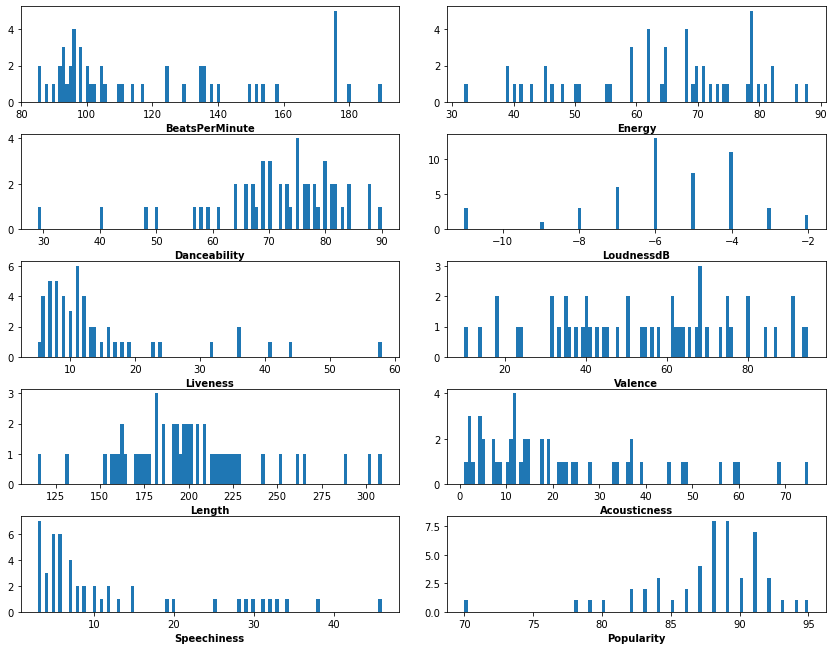

In [170]:
#list(axes.flat)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize= (12,9))

fig.tight_layout() #helps move graphs around

for i, this_ax in enumerate(axes.flat):
    col = num_cols[i]
    df[col].hist(bins=100, ax=this_ax, grid=False);
    this_ax.set_xlabel(col, weight='bold', size=10);

Increase the subplot figure sizes, improve the plot layout, and remove gridlines.

Use a color palette.

In [171]:
#we're skipping that for now (see non-tutorial notebook)

_Seabron Documentation on 'Choosing color palettes': https://seaborn.pydata.org/tutorial/color_palettes.html_

Apply this color palette to the histograms, and export the plot.

### Violin/Box plots

The default violin plot.

<AxesSubplot:xlabel='Genre', ylabel='Energy'>

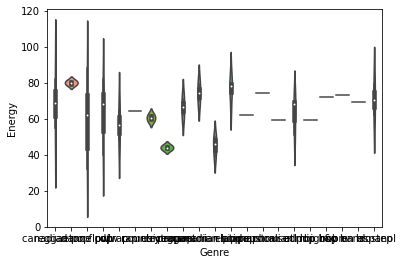

In [172]:
sns.violinplot(x='Genre', y='Energy', data=df)

Check the distribution of `Genre`.

In [173]:
df.Genre.value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
reggaeton flow      2
electropop          2
country rap         2
reggaeton           2
panamanian pop      2
canadian pop        2
brostep             2
dfw rap             2
big room            1
atl hip hop         1
australian pop      1
r&b en espanol      1
boy band            1
pop house           1
escape room         1
trap music          1
Name: Genre, dtype: int64

Combine similar generes to reduce cardinality.

In [174]:
import numpy as np

df['GENRE'] = np.where(df.Genre.str.contains('pop'), 'POP',
                        np.where(df.Genre.str.contains('hip hop'), 'HIP HOP',
                        np.where(df.Genre.str.contains('rap'), 'RAP',
                        'OTHER')))

df.Genre.value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
reggaeton flow      2
electropop          2
country rap         2
reggaeton           2
panamanian pop      2
canadian pop        2
brostep             2
dfw rap             2
big room            1
atl hip hop         1
australian pop      1
r&b en espanol      1
boy band            1
pop house           1
escape room         1
trap music          1
Name: Genre, dtype: int64

View data to ensure the mapping was done correctly.

In [175]:
df[['Genre', 'GENRE' ]].head()

,Genre,GENRE
0,canadian pop,POP
1,reggaeton flow,OTHER
2,dance pop,POP
3,pop,POP
4,dfw rap,RAP


Plot the new genere column created above.

<AxesSubplot:xlabel='GENRE', ylabel='Energy'>

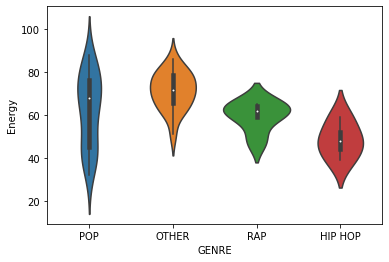

In [179]:
sns.violinplot(x='GENRE', y='Energy', data=df)



Box plot.

<AxesSubplot:xlabel='GENRE', ylabel='Energy'>

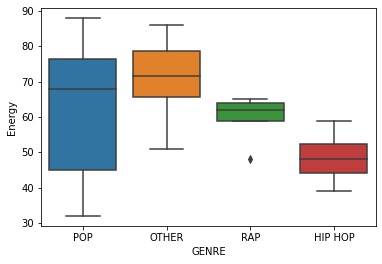

In [180]:
sns.boxplot(x='GENRE', y='Energy', data=df)

Add axes labels.

In [ ]:
#see above...

Change plot layout to add gridlines.

### Scatter plot

Plot loudness versus energy.

<AxesSubplot:xlabel='LoudnessdB', ylabel='Energy'>

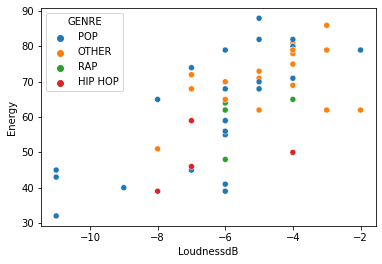

In [183]:
sns.scatterplot(x='LoudnessdB', y='Energy', data=df, color='tomato', hue="GENRE")

Label data points based on genre.

### Data Aggregation

How many total artists are there in this dataset?

Frequency of occurence for each artist.

Let's analyze (the average) popularity by genere.

You can also calculate the % distribution by dividing each count by the total number of records in the data frame.

Use `pandas` `groupby()` function to create an object.

View the size of each category of `Genre2`.

Create a series by adding an attribute (column).

Now you can run functions, such as `mean()`, `max()` etc, on the series.

Save the results.

Create a two-axis plot to view the genre size and average popularity.

Sort values from larger to smaller genre.

### Join (combine) data

Before we can join these two `pd.Series`, we must conver one of them into `pd.DataFrame` objects.

See: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html

Reset (flatten) the multi-level column names.

Let's save the results into a data frame.

Rename a column in this data frame.

Plot the results with genre sorted from large to small.

### Plotting pairwise data relationships using `seaborn`